In [1]:
#Loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
from geopy.geocoders import Nominatim

import warnings 
warnings.filterwarnings("ignore")

In [2]:
#loading the csv data to a pandas DataFrame
data = pd.read_csv("Downloads/mydata.csv")

In [3]:
data

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,N,04/04/2013 18:47,04/04/2013 19:00,1,759,2.50,...,40.765320,-73.976273,40.785648,CRD,11.0,1.0,0.5,2.50,0.0,15.00
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,1,N,05/04/2013 07:08,05/04/2013 07:17,1,540,1.60,...,0.000000,0.000000,0.000000,CRD,8.5,0.0,0.5,1.80,0.0,10.80
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,N,04/04/2013 17:59,04/04/2013 18:21,1,1318,3.60,...,40.754990,-74.009186,40.715374,CRD,16.5,1.0,0.5,3.60,0.0,21.60
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,N,04/04/2013 18:12,04/04/2013 18:25,1,799,1.90,...,40.763451,-73.955666,40.776642,CRD,10.0,1.0,0.5,3.45,0.0,14.95
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,N,04/04/2013 20:12,04/04/2013 20:29,1,1017,3.60,...,40.744755,-73.961662,40.761082,CRD,15.0,0.5,0.5,3.20,0.0,19.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,7E94181F851247ACE580CA73F8641E39,0893041AD047FFC989F18B0A3C4A1487,VTS,1,NaN,12/04/2013 23:27,12/04/2013 23:34,1,420,1.49,...,40.727802,-73.996758,40.742790,CSH,4.5,0.5,0.5,0.00,0.0,5.50
1995,4BFDCDE7229B5B4695AAA45549814ECD,B6634B7C3BB7272F6E84684DBF657AA2,VTS,1,NaN,12/04/2013 23:26,12/04/2013 23:36,1,600,2.66,...,40.756687,-73.948090,40.778542,CRD,29.0,0.5,0.5,5.90,0.0,35.90
1996,C901F6F260BB825D6ADA7BBA82EDCDAF,E81AB910D7ED1E06E56BD97F80E50A09,VTS,1,NaN,12/04/2013 23:30,12/04/2013 23:36,1,360,2.07,...,40.740677,-73.960777,40.760979,CSH,5.5,0.5,0.5,0.00,0.0,6.50
1997,90D83E0D0B4FF8DE2923C2977EF22C36,92153937578731DA2B1EC83D91E7FA3E,VTS,1,NaN,12/04/2013 23:33,12/04/2013 23:35,1,120,0.55,...,0.000000,0.000000,0.000000,CSH,6.0,0.5,0.5,0.00,0.0,7.00


In [4]:
data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,N,04/04/2013 18:47,04/04/2013 19:00,1,759,2.5,...,40.765320,-73.976273,40.785648,CRD,11.0,1.0,0.5,2.50,0.0,15.00
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,1,N,05/04/2013 07:08,05/04/2013 07:17,1,540,1.6,...,0.000000,0.000000,0.000000,CRD,8.5,0.0,0.5,1.80,0.0,10.80
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,N,04/04/2013 17:59,04/04/2013 18:21,1,1318,3.6,...,40.754990,-74.009186,40.715374,CRD,16.5,1.0,0.5,3.60,0.0,21.60
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,N,04/04/2013 18:12,04/04/2013 18:25,1,799,1.9,...,40.763451,-73.955666,40.776642,CRD,10.0,1.0,0.5,3.45,0.0,14.95
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,N,04/04/2013 20:12,04/04/2013 20:29,1,1017,3.6,...,40.744755,-73.961662,40.761082,CRD,15.0,0.5,0.5,3.20,0.0,19.20


In [5]:
#print last 5 rows of the dataset 
data.tail()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
1994,7E94181F851247ACE580CA73F8641E39,0893041AD047FFC989F18B0A3C4A1487,VTS,1,NaN,12/04/2013 23:27,12/04/2013 23:34,1,420,1.49,...,40.727802,-73.996758,40.742790,CSH,4.5,0.5,0.5,0.0,0.0,5.5
1995,4BFDCDE7229B5B4695AAA45549814ECD,B6634B7C3BB7272F6E84684DBF657AA2,VTS,1,NaN,12/04/2013 23:26,12/04/2013 23:36,1,600,2.66,...,40.756687,-73.948090,40.778542,CRD,29.0,0.5,0.5,5.9,0.0,35.9
1996,C901F6F260BB825D6ADA7BBA82EDCDAF,E81AB910D7ED1E06E56BD97F80E50A09,VTS,1,NaN,12/04/2013 23:30,12/04/2013 23:36,1,360,2.07,...,40.740677,-73.960777,40.760979,CSH,5.5,0.5,0.5,0.0,0.0,6.5
1997,90D83E0D0B4FF8DE2923C2977EF22C36,92153937578731DA2B1EC83D91E7FA3E,VTS,1,NaN,12/04/2013 23:33,12/04/2013 23:35,1,120,0.55,...,0.000000,0.000000,0.000000,CSH,6.0,0.5,0.5,0.0,0.0,7.0
1998,4BA97FEB59F6EFEAD580540895960183,4C8EEBE9A500FC6508E2CDE412E3E22E,VTS,1,NaN,12/04/2013 23:24,12/04/2013 23:36,6,720,1.87,...,40.739746,-73.986580,40.757381,CSH,7.0,0.5,0.5,0.0,0.0,8.0


In [6]:
#getting some info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   medallion            1999 non-null   object 
 1    hack_license        1998 non-null   object 
 2    vendor_id           1999 non-null   object 
 3    rate_code           1999 non-null   int64  
 4    store_and_fwd_flag  152 non-null    object 
 5   pickup_datetime      1999 non-null   object 
 6    dropoff_datetime    1999 non-null   object 
 7   passenger_count      1999 non-null   int64  
 8   trip_time_in_secs    1999 non-null   int64  
 9   trip_distance        1999 non-null   float64
 10  pickup_longitude     1999 non-null   float64
 11  pickup_latitude      1999 non-null   float64
 12  dropoff_longitude    1999 non-null   float64
 13  dropoff_latitude     1999 non-null   float64
 14  payment_type         1999 non-null   object 
 15  fare_amount          1999 non-null   f

In [7]:
data.isnull().sum()

medallion                 0
 hack_license             1
 vendor_id                0
 rate_code                0
 store_and_fwd_flag    1847
pickup_datetime           0
 dropoff_datetime         0
passenger_count           0
trip_time_in_secs         0
trip_distance             0
pickup_longitude          0
pickup_latitude           0
dropoff_longitude         0
dropoff_latitude          0
payment_type              0
fare_amount               0
surcharge                 0
mta_tax                   0
tip_amount                0
tolls_amount              0
total_amount              0
dtype: int64

In [8]:
data.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,1.015508,2.109055,691.584292,2.872791,-73.162917,40.299853,-73.088737,40.279220,11.784892,0.515758,0.499750,1.457339,0.152791,14.410530
std,0.198240,1.739005,454.923989,3.004693,7.719897,4.252343,8.059052,4.346819,8.926292,0.147134,0.011183,1.904615,0.915631,10.491765
min,1.000000,1.000000,0.000000,0.000000,-74.028381,0.000000,-74.063713,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,3.500000
25%,1.000000,1.000000,360.000000,1.135000,-73.992161,40.732190,-73.992965,40.727857,6.500000,0.500000,0.500000,0.000000,0.000000,8.300000
50%,1.000000,1.000000,600.000000,1.860000,-73.983299,40.749306,-73.982567,40.746666,9.000000,0.500000,0.500000,1.000000,0.000000,11.250000
75%,1.000000,3.000000,900.000000,3.400000,-73.970737,40.764408,-73.965210,40.765718,13.750000,0.500000,0.500000,2.000000,0.000000,16.500000
max,5.000000,6.000000,3300.000000,24.200000,0.000000,40.866375,0.000000,40.919964,120.000000,1.000000,0.500000,15.600000,10.250000,120.000000


<h1> What is the distribution of number of passengers per trip?

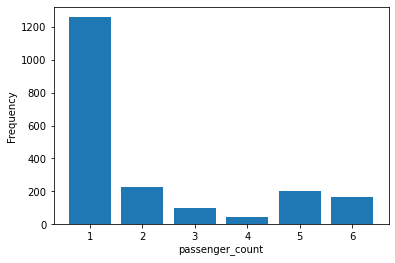

In [9]:
# Get the frequency of each passenger count
passenger_counts = data["passenger_count"].value_counts()

# Sort the passenger counts in ascending order
passenger_counts = passenger_counts.sort_index()

# Plot a histogram of the passenger counts
plt.bar(passenger_counts.index, passenger_counts.values)
plt.xlabel("passenger_count")
plt.ylabel("Frequency")
plt.show()

In [10]:
# checking the distribution of condition variable
data['passenger_count'].value_counts()

1    1257
2     225
5     202
6     169
3      99
4      47
Name: passenger_count, dtype: int64

<h1>What is the distribution of payment_type?

In [11]:
# Get the frequency of each payment_type
payment_type_counts = data["payment_type"].value_counts()

print(payment_type_counts)

CRD    1248
CSH     750
UNK       1
Name: payment_type, dtype: int64


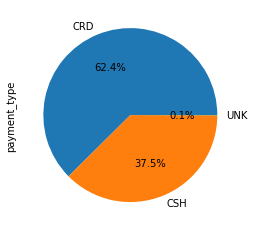

In [12]:
# Plot a pie chart of the payment_type distribution
payment_type_counts.plot.pie(autopct='%1.1f%%')
plt.show()

<h1>What is the distribution of fare amount?

In [13]:
# Get the summary statistics of the fare amount
fare_amount_stats = data["fare_amount"].describe()

print(fare_amount_stats)

count    1999.000000
mean       11.784892
std         8.926292
min         2.500000
25%         6.500000
50%         9.000000
75%        13.750000
max       120.000000
Name: fare_amount, dtype: float64


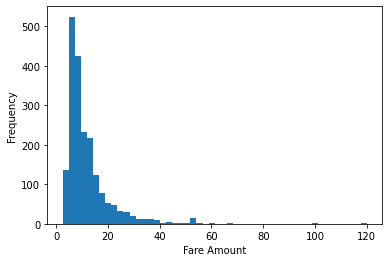

In [14]:
# Plot a histogram of the fare amount
plt.hist(data["fare_amount"], bins=50)
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.show()


<h1>What is the distribution of tip amount?

In [15]:
# Get the summary statistics of the tip amount
tip_amount_stats = data["tip_amount"].describe()

print(tip_amount_stats)

count    1999.000000
mean        1.457339
std         1.904615
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        15.600000
Name: tip_amount, dtype: float64


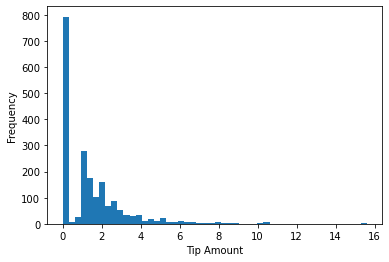

In [16]:

# Plot a histogram of the tip amount
plt.hist(data["tip_amount"], bins=50)
plt.xlabel("Tip Amount")
plt.ylabel("Frequency")
plt.show()

<h1>What is the distribution of total amount?

In [17]:
# Get the summary statistics of the total amount
total_amount_stats = data["total_amount"].describe()

print(total_amount_stats)

count    1999.000000
mean       14.410530
std        10.491765
min         3.500000
25%         8.300000
50%        11.250000
75%        16.500000
max       120.000000
Name: total_amount, dtype: float64


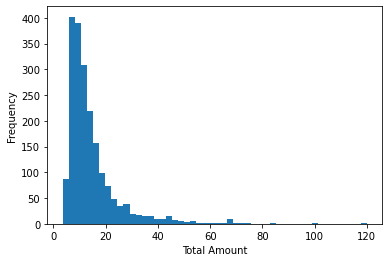

In [18]:
# Plot a histogram of the total amount
plt.hist(data["total_amount"], bins=50)
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.show()

<h1>What are top 5 busiest hours of the day?

In [19]:

# Extract the hour from the pickup datetime column
data["pickup_hour"] = pd.to_datetime(data["pickup_datetime"]).dt.hour
# Extract the hour from the dropoff datetime column
data["dropoff_hour"] = pd.to_datetime(data[" dropoff_datetime"]).dt.hour

# Group the data by pickup hour and count the number of entries
pickup_hourly_counts = data.groupby("pickup_hour").size().reset_index(name="counts")
# Group the data by dropoff hour and count the number of entries
dropoff_hourly_counts = data.groupby("dropoff_hour").size().reset_index(name="counts")

# Sort the data by counts in descending order for pickup hour
pickup_hourly_counts = pickup_hourly_counts.sort_values("counts", ascending=False)
# Sort the data by counts in descending order for dropoff hour
dropoff_hourly_counts = dropoff_hourly_counts.sort_values("counts", ascending=False)

# Print the top 5 busiest hours for pickup
print(pickup_hourly_counts.head(5))
# Print the top 5 busiest hours for dropoff
print(dropoff_hourly_counts.head(5))

    pickup_hour  counts
21           23     532
18           20     497
19           21     403
0             0     327
16           18      74
    dropoff_hour  counts
21            23     526
18            20     486
19            21     419
0              0     336
16            18      68


In [20]:
# Extract the hour from the timestamp column
data["hour"] = pd.to_datetime(data["pickup_datetime"]).dt.hour

# Group the data by hour and count the number of entries
hourly_counts = data.groupby("hour").size().reset_index(name="counts")

# Sort the data by counts in descending order
hourly_counts = hourly_counts.sort_values("counts", ascending=False)

# Print the top 5 busiest hours
print(hourly_counts.head(5))

    hour  counts
21    23     532
18    20     497
19    21     403
0      0     327
16    18      74


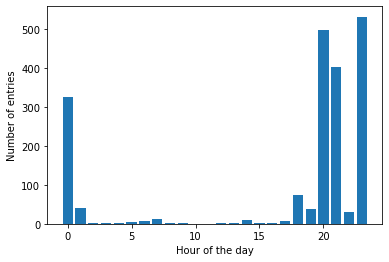

In [21]:
# Extract the hour from the timestamp column
data["hour"] = pd.to_datetime(data["pickup_datetime"]).dt.hour

# Group the data by hour and count the number of entries
hourly_counts = data.groupby("hour").size().reset_index(name="counts")

# Sort the data by counts in descending order
hourly_counts = hourly_counts.sort_values("counts", ascending=False)

# Plot the hourly counts
plt.bar(hourly_counts["hour"], hourly_counts["counts"])
plt.xlabel("Hour of the day")
plt.ylabel("Number of entries")
plt.show()

<h1>What are the top 10 busiest locations of the city?

In [22]:
# Group the data by longitude and latitude and count the number of entries
location_counts = data.groupby(["pickup_longitude","pickup_latitude"]).size().reset_index(name="counts")

# Sort the data by counts in descending order
location_counts = location_counts.sort_values("counts", ascending=False)

# Print the top 10 busiest locations
print(location_counts.head(10))

      pickup_longitude  pickup_latitude  counts
1975          0.000000         0.000000      22
509         -73.992081        40.725529       2
1863        -73.948128        40.774544       2
1319        -73.977173        40.746906       1
1315        -73.977287        40.763737       1
1316        -73.977219        40.680717       1
1317        -73.977203        40.752331       1
1318        -73.977196        40.726437       1
1320        -73.977112        40.751930       1
1313        -73.977303        40.758057       1


In [23]:
# Group the data by pickup and drop off longitude and latitude and count the number of entries
location_counts = data.groupby(["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]).size().reset_index(name="counts")

# Sort the data by counts in descending order
location_counts = location_counts.sort_values("counts", ascending=False)

# Print the top 10 busiest locations
print(location_counts.head(10))

      pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
1977          0.000000         0.000000           0.000000          0.000000   
1328        -73.976952        40.682274         -73.953651         40.677238   
1326        -73.977028        40.764423         -73.960907         40.761597   
1325        -73.977036        40.784916         -73.959747         40.808399   
1324        -73.977051        40.774887         -73.966972         40.764023   
1323        -73.977058        40.681561         -73.988091         40.718441   
1322        -73.977081        40.790035         -74.014488         40.716724   
1321        -73.977112        40.751930         -73.981552         40.741089   
1320        -73.977173        40.746906         -73.946800         40.780624   
1319        -73.977196        40.726437         -73.977242         40.752289   

      counts  
1977      22  
1328       1  
1326       1  
1325       1  
1324       1  
1323       1  
1322       1  

In [24]:
# Group the data by pickup and drop off longitude and latitude and count the number of entries
location_counts = data.groupby(["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]).size().reset_index(name="counts")

# Sort the data by counts in descending order
location_counts = location_counts.sort_values("counts", ascending=False)

# Get the top 10 busiest locations
busiest_locations = location_counts.head(10)

# Initialize the geolocator
geolocator = Nominatim(user_agent="geoapiExercises")

# create an empty list to store the city names
city_names = []

# Iterate through the busiest locations
for index, row in busiest_locations.iterrows():
    # Get the latitude and longitude of the pickup location
    pickup_latitude = row["pickup_latitude"]
    pickup_longitude = row["pickup_longitude"]
    # Get the latitude and longitude of the dropoff location
    dropoff_latitude = row["dropoff_latitude"]
    dropoff_longitude = row["dropoff_longitude"]
    # Use the geolocator to get the city name for pickup location
    pickup_location = geolocator

In [28]:
# Create a new column called "trip_id" that groups the data by pickup and dropoff datetime, pickup_longitude, pickup_latitude, dropoff_longitude and dropoff_latitude
data["trip_id"] = data[["pickup_datetime"," dropoff_datetime","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]].apply(lambda x: '-'.join(x.astype(str)), axis=1)

<h1>Which trip has the highest standard deviation of travel time?

In [30]:


# Calculate the travel time for each trip
data["travel_time"] = pd.to_datetime(data[" dropoff_datetime"]) - pd.to_datetime(data["pickup_datetime"])
data["travel_time"] = data["travel_time"].dt.total_seconds()

# Group the data by trip_id and calculate the standard deviation of the travel time
trips_std = data.groupby("trip_id")["travel_time"].std().reset_index(name="std_travel_time")

# Sort the data by standard deviation in descending order
trips_std = trips_std.sort_values("std_travel_time", ascending=False)

# Print the trip with the highest standard deviation of travel time
print(trips_std.head(1))

                                             trip_id  std_travel_time
0  03/04/2013 15:52-03/04/2013 16:08--73.987297-4...              NaN


The result you got is indicating that the standard deviation of the travel_time for the trip_id is NaN, this means that there is only one trip with this trip_id, In statistics, the standard deviation is calculated by finding the square root of the variance of a set of values. The variance is calculated by taking the average of the squared differences of each value from the mean. If there is only one value, the variance is zero, and the square root of zero is undefined (NaN), since there is no spread in the data.
To get the correct result, you need to have more than one trip with the same trip_id, otherwise, the standard deviation will be NaN

<h1>Which trip has most consistent fares?

In [34]:
# Create a new column called "trip_id" that groups the data by pickup and dropoff datetime, pickup_longitude, pickup_latitude, dropoff_longitude and dropoff_latitude
data["trip_id"] = data[["pickup_datetime"," dropoff_datetime","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]].apply(lambda x: '-'.join(x.astype(str)), axis=1)

# Group the data by trip_id and calculate the variance of the fare
trips_variance = data.groupby("trip_id")["fare_amount"].var().reset_index(name="var_fare")

# Sort the data by variance in ascending order
trips_variance = trips_variance.sort_values("var_fare", ascending=True)

# Print the trip with the lowest variance of fares
print(trips_variance.head(1))

                                             trip_id  var_fare
0  03/04/2013 15:52-03/04/2013 16:08--73.987297-4...       NaN


In [36]:
# Create a new column called "trip_id" that groups the data by pickup and dropoff datetime, pickup_longitude, pickup_latitude, dropoff_longitude and dropoff_latitude
data["trip_id"] = data[["pickup_datetime"," dropoff_datetime","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]].apply(lambda x: '-'.join(x.astype(str)), axis=1)

# Group the data by trip_id and check the number of observations in each trip
trips_observations = data.groupby("trip_id").size().reset_index(name='num_observations')

In [39]:
trips_observations = trips_observations[trips_observations['num_observations'] > 10]
trips_observations

,trip_id,num_observations


In [42]:
# Create a new column called "trip_id" that groups the data by pickup and dropoff datetime, pickup_longitude, pickup_latitude, dropoff_longitude and dropoff_latitude
data["trip_id"] = data[["pickup_datetime"," dropoff_datetime","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]].apply(lambda x: '-'.join(x.astype(str)), axis=1)

# Group the data by trip_id and check the number of observations in each trip
trips_observations = data.groupby("trip_id").size().reset_index(name='num_observations')
trips_observations = trips_observations[trips_observations['num_observations'] > 30]

In [43]:
trips_observations

,trip_id,num_observations


In [44]:
print(data.isnull().sum())

medallion                 0
 hack_license             1
 vendor_id                0
 rate_code                0
 store_and_fwd_flag    1847
pickup_datetime           0
 dropoff_datetime         0
passenger_count           0
trip_time_in_secs         0
trip_distance             0
pickup_longitude          0
pickup_latitude           0
dropoff_longitude         0
dropoff_latitude          0
payment_type              0
fare_amount               0
surcharge                 0
mta_tax                   0
tip_amount                0
tolls_amount              0
total_amount              0
pickup_hour               0
dropoff_hour              0
hour                      0
travel_time               0
trip_id                   0
dtype: int64


In [45]:
print(data.dtypes)

medallion               object
 hack_license           object
 vendor_id              object
 rate_code               int64
 store_and_fwd_flag     object
pickup_datetime         object
 dropoff_datetime       object
passenger_count          int64
trip_time_in_secs        int64
trip_distance          float64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
payment_type            object
fare_amount            float64
surcharge              float64
mta_tax                float64
tip_amount             float64
tolls_amount           float64
total_amount           float64
pickup_hour              int64
dropoff_hour             int64
hour                     int64
travel_time            float64
trip_id                 object
dtype: object


In [51]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd

# # Load the data
# data = pd.read_csv("taxi_data.csv")

# Create the app
app = dash.Dash()

# Create the layout
app.layout = html.Div([
    html.H1("Taxi Dashboard"),
    dcc.Dropdown(
        id='payment-type-dropdown',
        options=[{'label': i, 'value': i} for i in data['payment_type'].unique()],
        value='Cash'
    ),
    dcc.Graph(id='fare-amount-graph'),
    dcc.Graph(id='tip-amount-graph')
])

# Create the callback function
@app.callback(
    [Output('fare-amount-graph', 'figure'),
     Output('tip-amount-graph', 'figure')],
    [Input('payment-type-dropdown', 'value')]
)
def update_graphs(payment_type):
    filtered_data = data[data['payment_type'] == payment_type]
    fare_data = [go.Histogram(x=filtered_data['fare_amount'])]
    tip_data = [go.Histogram(x=filtered_data['tip_amount'])]
    return fare_data, tip_data

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: [Errno 48] Address already in use